# Gemicai tutorial 5: Advanced ClassifierTree
In this tutorial we'll go a bit more in depth about what the ClassifierTree can do.

In [1]:
import gemicai as gem
import torch
import torchvision.models as models

## 3.1 Loading ClassifierTree


In [11]:
dx_tree_path = '/mnt/SharedStor/trees/dx_tree'

tree = gem.ClassifierTree.from_dir(dx_tree_path)

print(tree)

# Print file path of all the roots children
for child in tree.root.children():
    print(child)

|   Depth | Label            |   Classifiers |   Avg. classes |
|---------+------------------+---------------+----------------|
|       0 | BodyPartExamined |             1 |           20   |
|       1 | StudyDescription |            20 |            8.8 |
/mnt/SharedStor/trees/dx_tree/FOOT
/mnt/SharedStor/trees/dx_tree/PELVIS
/mnt/SharedStor/trees/dx_tree/SKULL
/mnt/SharedStor/trees/dx_tree/SHOULDER
/mnt/SharedStor/trees/dx_tree/TSPINE
/mnt/SharedStor/trees/dx_tree/CSPINE
/mnt/SharedStor/trees/dx_tree/CLAVICLE
/mnt/SharedStor/trees/dx_tree/SSPINE
/mnt/SharedStor/trees/dx_tree/ARM
/mnt/SharedStor/trees/dx_tree/ANKLE
/mnt/SharedStor/trees/dx_tree/KNEE
/mnt/SharedStor/trees/dx_tree/LSPINE
/mnt/SharedStor/trees/dx_tree/LEG
/mnt/SharedStor/trees/dx_tree/ABDOMEN
/mnt/SharedStor/trees/dx_tree/ELBOW
/mnt/SharedStor/trees/dx_tree/HAND
/mnt/SharedStor/trees/dx_tree/HIP
/mnt/SharedStor/trees/dx_tree/VERTEBRAL COLUMN
/mnt/SharedStor/trees/dx_tree/EXTREMITY
/mnt/SharedStor/trees/dx_tree/CHEST


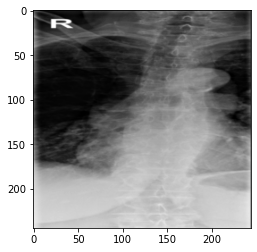

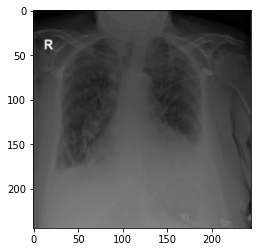

{'BodyPartExamined': [('CSPINE', 0.10594857484102249),
                      ('ELBOW', 0.09386724978685379),
                      ('SHOULDER', 0.0877382829785347)],
 'StudyDescription': [('Cwk', 1.0)]}


In [17]:
# Retrieving 2 image tensors from the testset for demonstration purposes. 
image_iter = iter(testset)
image1 = next(image_iter)[0]
image2 = next(image_iter)[0]

from matplotlib import pyplot as plt
from pprint import pprint

def plot_image(tensor, cmap='gray'):
    plt.imshow(tensor[0], cmap=cmap)
    plt.show()
    
plot_image(image1)
plot_image(image2)

pprint(tree.classify(image1))

A ClassifierTree consits of ClassifierNodes, when intialising the tree, its nodes are automatically saved. You can retrieve a tree by specifying its directory

In [3]:
tree = None
tree = gem.ClassifierTree.from_dir(dx_tree_path)
print(tree)

|   Depth | Label            |   Classifiers |   Avg. classes |
|---------+------------------+---------------+----------------|
|       0 | BodyPartExamined |             1 |           20   |
|       1 | StudyDescription |            20 |            8.8 |


## 3.2 Training the tree
To train the whole tree at once, simply use the train function. But first we need a train and test dataset, to learn more about datasets check out tutorial 3. 

In [4]:

constraints = {
    'BodyPartExamined': ['VERTEBRAL COLUMN', 'CHEST', 'KNEE', 'EXTREMITY', 'HIP', 'PELVIS', 'TSPINE',
                         'FOOT', 'SHOULDER', 'LSPINE', 'ELBOW', 'CSPINE', 'ANKLE', 'HAND', 'CLAVICLE',
                         'ARM', 'ABDOMEN', 'SKULL', 'LEG',]
}

train_path = '/mnt/SharedStor/gemset/DX/train'
test_path = '/mnt/SharedStor/gemset/DX/test'

trainset = gem.DicomoDataset.get_dicomo_dataset(train_path, relevant_labels)
testset = gem.DicomoDataset.get_dicomo_dataset(test_path, relevant_labels)


In [5]:
tree.train(trainset, epochs=100)

Training of ClassifierTree /mnt/SharedStor/trees/dx_tree begun. Total nodes to train: 21
|  Node | Depth | Parents              |  Classes | Train size |  Train acc | Elapsed  | 
|-------+-------+----------------------+----------+------------+------------+----------|
|     1 |     0 | .                    |       20 |       7613 |      2.72% | 01:03:07 | 
|     2 |     1 | FOOT                 |       13 |        919 |      12.3% | 00:18:15 | 
|     3 |     1 | PELVIS               |       13 |        350 |     82.57% | 00:14:47 | 
|     4 |     1 | SKULL                |        2 |         32 |     84.38% | 00:12:19 | 
|     5 |     1 | SHOULDER             |       17 |        635 |      0.47% | 00:16:22 | 
|     6 |     1 | TSPINE               |        3 |         47 |      2.13% | 00:12:22 | 
|     7 |     1 | CSPINE               |        1 |        106 |     100.0% | 00:12:51 | 
|     8 |     1 | CLAVICLE             |        5 |         28 |       0.0% | 00:12:13 | 
|     9 |   

KeyboardInterrupt: 

## 3.3 Evaluating the tree
Training a ClassifierTree like this is a good start, but to get the most out of your tree the indidual nodes will need tweaking. To inspect the trees' performance call evaluate.

In [7]:
tree.evaluate(testset)

|  Node | Depth | Parents              |  Classes |  Test size |   Test acc | 
|-------+-------+----------------------+----------+------------+------------|
|     1 |     1 | .                    |       20 |       1200 |      1.92% | 
|     2 |     1 | FOOT                 |       13 |        151 |     11.92% | 
|     3 |     1 | PELVIS               |       13 |         60 |     100.0% | 
|     4 |     1 | SKULL                |        2 |          3 |     100.0% | 
|     5 |     1 | SHOULDER             |       17 |        102 |       0.0% | 
|     6 |     1 | TSPINE               |        3 |          9 |       0.0% | 
|     7 |     1 | CSPINE               |        1 |         23 |     100.0% | 
|     8 |     1 | CLAVICLE             |        5 |          1 |       0.0% | 
|     9 |     1 | SSPINE               |        1 |          0 |       N/A% | 
|    10 |     1 | ARM                  |        3 |          3 |       0.0% | 
|    11 |     1 | ANKLE                |        9 |  

## 3.4 Tweaking individual nodes in the tree
From the evaluation we can see that node 2 appears to not be performing very well. To train this individual node, we first need to find it's path

In [21]:
parent = 'FOOT'

# By default the filename of the node is <node.label>.gemnode
node_path = '/mnt/SharedStor/trees/dx_tree/'+parent+'/StudyDescription.gemnode'

node = gem.ClassifierNode.from_file(node_path)

# Select neural network from the node
net = node.classifier
print(type(net))

print(net.classes)


<class 'gemicai.Classifier.Classifier'>
['Voet links', 'Enkel links', 'Voet rechts', 'Voet links kind', 'Calcaneus rechts', 'Voet beiderzijds', 'Voet rechts kind', 'Enkel rechts', 'Teen rechts', 'Teen links', 'Calcaneus links', 'Enkel beiderzijds', 'Teen links kind']


As you can see, net is an instance of Gemicai.Classifier, we already know how to train a Classifier! For more information about Gemicai.Classifier see tutorial 2. 

In [22]:
constraints = {
    'BodyPartExamined': parent
}

trainsubset = trainset.subset(constraints)[1]
testsubset = testset.subset(constraints)[1]


trainsubset.summarize('StudyDescription')
testsubset.summarize('StudyDescription')


| Class (StudyDescription)   |   Frequency |
|----------------------------+-------------|
| Voet rechts                |         222 |
| Voet beiderzijds           |         140 |
| Voet links                 |         221 |
| Enkel rechts               |         124 |
| Enkel links                |         132 |
| Calcaneus links            |          11 |
| Calcaneus rechts           |          13 |
| Enkel beiderzijds          |          23 |
| Voet rechts kind           |           4 |
| Teen links                 |           7 |
| Teen links kind            |           1 |
| Teen rechts                |          14 |
| Voet links kind            |           9 |
| Teen rechts kind           |           2 |

Total number of training images: 923 
Total number of classes: 14

| Class (StudyDescription)   |   Frequency |
|----------------------------+-------------|
| Voet rechts                |          58 |
| Voet beiderzijds           |          28 |
| Voet links                 |  

In [80]:
net.train(trainsubset, test_dataset=testsubset, epochs=25, verbosity=2)

| Epoch | Avg. loss | Train Acc. | Test Acc.  | Elapsed  |   ETA    |
|-------+-----------+------------+------------+----------+----------|
|     1 | 0.3117709 | 19.6%      | 23.33%     | 00:00:07 | 02:11:46 |
|     2 | 0.3124463 | 19.6%      | 23.33%     | 00:00:15 | 02:15:00 |
|     3 | 0.3124463 | 19.6%      | 23.33%     | 00:00:15 | 02:14:59 |
|     4 | 0.3124463 | 19.6%      | 23.33%     | 00:00:14 | 02:14:58 |
|     5 | 0.3124463 | 19.6%      | 23.33%     | 00:00:14 | 02:14:58 |


KeyboardInterrupt: 

In [70]:
net.evaluate(testsubset, verbosity=2)

| <class 'list'> | <class 'list'> | <class 'list'> |
| Class            |   Total |   Correct | Acc   |
|------------------+---------+-----------+-------|
| ELBOW            |      92 |         0 | 0.0%  |
| VERTEBRAL COLUMN |      55 |         0 | 0.0%  |
| CHEST            |     297 |         0 | 0.0%  |
| PELVIS           |      60 |         0 | 0.0%  |
| SHOULDER         |     102 |         0 | 0.0%  |
| KNEE             |     152 |         0 | 0.0%  |
| HIP              |      63 |         0 | 0.0%  |
| FOOT             |     151 |         0 | 0.0%  |
| EXTREMITY        |      85 |        56 | 65.9% |
| LSPINE           |      36 |         0 | 0.0%  |
| ABDOMEN          |       7 |         0 | 0.0%  |
| HAND             |      43 |         0 | 0.0%  |
| CSPINE           |      23 |         1 | 4.3%  |
| ANKLE            |      16 |         0 | 0.0%  |
| CLAVICLE         |       1 |         0 | 0.0%  |
| LEG              |       2 |         0 | 0.0%  |
| SKULL            |       3 

(4.83, 1200, 58)

In [ ]:
node.save()
tree.evaluate(testset)

If you want, you can assign a whole new classifier to the node. First train the new and improved Classifier, then assign it to the node's classifier, then save the node.

In [90]:

resnet18 = models.resnet18(pretrained=False)

newnet = gem.Classifier(resnet18, trainsubset.classes('StudyDescription'), enable_cuda=True)


In [92]:

newnet.train(trainsubset, test_dataset=testsubset, epochs=30, verbosity=2)

newnet.evaluate(testsubset, verbosity=2)


| Epoch | Avg. loss | Train Acc. | Test Acc.  | Elapsed  |   ETA    |
|-------+-----------+------------+------------+----------+----------|
|     1 | 0.2675403 | 63.47%     | 67.55%     | 00:00:09 | 03:36:34 |
|     2 | 0.0992208 | 81.67%     | 82.78%     | 00:00:18 | 03:40:59 |
|     3 | 0.0530914 | 80.83%     | 82.78%     | 00:00:17 | 03:40:34 |
|     4 | 0.0440298 | 78.75%     | 78.81%     | 00:00:17 | 03:40:40 |
|     5 | 0.0520361 | 83.33%     | 85.43%     | 00:00:17 | 03:40:35 |
|     6 | 0.0373383 | 86.39%     | 87.42%     | 00:00:17 | 03:40:38 |
|     7 | 0.0351050 | 83.89%     | 86.09%     | 00:00:17 | 03:40:34 |
|     8 | 0.0240775 | 82.36%     | 80.79%     | 00:00:17 | 03:40:35 |
|     9 | 0.0244584 | 83.89%     | 80.79%     | 00:00:17 | 03:40:31 |
|    10 | 0.0201383 | 76.94%     | 74.17%     | 00:00:17 | 03:40:37 |
|    11 | 0.0257878 | 81.94%     | 82.12%     | 00:00:17 | 03:40:36 |
|    12 | 0.0247606 | 81.53%     | 82.78%     | 00:00:17 | 03:40:34 |
|    13 | 0.0297228 

(94.7, 151, 143)

Once we are satisfied the with networks performance, we can write it back to the node and save it.

In [93]:
print(node.file_path)

/mnt/SharedStor/trees/dx_tree/FOOT/StudyDescription.gemnode


In [86]:

node.classifier = newnet

node.save()


Now when, evaluating the tree again, we can see that the accuracy of node 2 improved!

In [87]:

tree.evaluate(testset)


|  Node | Depth | Parents              |  Classes |  Test size |   Test acc | 
|-------+-------+----------------------+----------+------------+------------|
|     1 |     1 | .                    |       20 |       1200 |     99.92% | 
|     2 |     1 | FOOT                 |       13 |        151 |     11.92% | 
|     3 |     1 | PELVIS               |       13 |         60 |     100.0% | 
|     4 |     1 | SKULL                |        2 |          3 |     100.0% | 
|     5 |     1 | SHOULDER             |       17 |        102 |       0.0% | 
|     6 |     1 | TSPINE               |        3 |          9 |       0.0% | 
|     7 |     1 | CSPINE               |        1 |         23 |     100.0% | 
|     8 |     1 | CLAVICLE             |        5 |          1 |       0.0% | 
|     9 |     1 | SSPINE               |        1 |          0 |       N/A% | 
|    10 |     1 | ARM                  |        3 |          3 |       0.0% | 
|    11 |     1 | ANKLE                |        9 |  

In [25]:

def count_doubles(a, b):
    total, doubles = 0, 0
    for data in a:
        for d in b:
            if (data[0].numpy() == d[0].numpy()).all():
                doubles += 1
                break
        total += 1
    print('Total: {}  Doubles: {}'.format(total, doubles))
    
    
    
count_doubles(trainsubset, testsubset)

Total: 923  Doubles: 1


In [26]:
count_doubles(testsubset, testsubset)

Total: 223  Doubles: 223
